### Evaluación de métricas y variables de los modelos de perceptrón multicapa o MLP

In [7]:
import sys
sys.path.append("../../") # go to parent dir

In [8]:
from modelos import *
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import pandas as pd
import calplot
from pandas import DatetimeIndex

In [9]:
pd.options.display.max_columns = 50 # para mostrar todas las columnas

#### Cargamos los datos de las metricas de MLFlow para evaluar los modelos

In [10]:
runs = pd.read_csv('runs/runs_mlp_3.csv')
runs

,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,activation,alpha,batch_size,hidden_layer_sizes,random_state,CV_TEST_RMSE,CV_TRAIN_RMSE,RANDOM SEED,TEST_MAX_ERROR,TEST_MEAN_ABS_ERROR,TEST_MEDIAN_ABS_ERROR,TEST_ROOT_MEAN_SQ_ERROR,Training Info
0,2024-04-28 20:43:21,5.9s,643c5f4d89bf4ac1b66a8440dbbd599d,mlp-random-search,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,logistic,0.2001,236.0,"(49,)",NaN,0.365700,0.359315,777,2.632952,0.274911,0.196136,0.390535,Mejor modelo conseguido con RandomizedSearchCV...
1,2024-04-28 15:38:46,5.0s,13480390f38049209b17a5dfa3f63cdc,mlp-grid-search,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,logistic,0.0001,100.0,"(100,)",NaN,0.341847,0.319029,777,2.572918,0.275861,0.198844,0.393910,Mejor modelo conseguido con GridSearchCV sin e...
2,2024-04-28 16:32:31,5.0s,896de8df13fb42399ef5f4bd61bae27d,perceptron-cota-inferior-escalado-solo_X,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,NaN,NaN,NaN,NaN,777.0,0.280664,0.199384,777,2.554253,0.291718,0.221905,0.396413,Modelo perceptrón sin modificar hiperparámetro...
3,2024-04-28 21:29:27,6.0s,868cfe21feb841558a11f270a0a6392f,esc-X-mlp-random-search,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,relu,0.2801,556.0,"(67, 93, 54)",NaN,0.263713,0.198438,777,2.512735,0.280249,0.197278,0.398988,Mejor modelo conseguido con RandomizedSearchCV...
4,2024-04-28 21:18:46,5.7s,5fc83812887c4e388228ba336363139b,esc-mlp-random-search,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,relu,0.2801,556.0,"(67, 93, 54)",NaN,0.278526,0.196678,777,2.856663,0.282415,0.197944,0.402183,Mejor modelo conseguido con RandomizedSearchCV...
5,2024-04-28 15:47:49,5.4s,01b8c427c8d046918d378b1bb203122a,perceptron-cota-inferior-escalado,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,NaN,NaN,NaN,NaN,777.0,0.302469,0.208992,777,2.929191,0.300450,0.228732,0.409061,Modelo perceptrón escalado sin modificar hiper...
6,2024-04-28 17:40:33,11.6s,a2540154c6ce4ae1b14f4d3f50969ece,esc-X-mlp-grid-search,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,relu,0.0100,100.0,"(100, 100, 100)",NaN,0.252054,0.102552,777,2.854189,0.299098,0.208000,0.424313,Mejor modelo conseguido con GridSearchCV con e...
7,2024-04-28 16:22:44,5.1s,5aeb2417501a49fc827f0d03bc9f0eeb,esc-mlp-grid-search,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,relu,0.0100,100.0,"(100, 100, 100)",NaN,0.256939,0.091320,777,2.577159,0.298938,0.206109,0.433650,Mejor modelo conseguido con GridSearchCV con e...
8,2024-04-28 15:14:34,7.5s,13c70447f685455ba90b48829d1443f0,perceptron-cota-inferior,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,NaN,NaN,NaN,NaN,777.0,0.445806,0.436226,777,2.287027,0.348081,0.281890,0.453630,Modelo perceptrón sin modificar hiperparámetro...


**IMPORTANTE**
-
**Para entender el nombre de cada run hay que entender los modelos entrenados.**

- **3 modelos sin escalado**
  
  No tienen un nombre especial, simplemente indican su nombre. Encontramos:
  - perceptron-cota-inferior
  - mlp-grid-search
  - mlp-random-search
- **3 modelos escalando todas las variables** (X e Y)

  Son:
  - perceptron-cota-inferior-escalado
  - esc-mlp-grid-search
  - esc-mlp-random-search
- **3 modelos escalando solo las X**

  Son:
  - perceptron-cota-inferior-escalado-solo_X
  - esc-X-mlp-grid-search
  - esc-X-mlp-random-search

### RAIZ DE ECM por SUBCONJUNTOS

Pasamos a ver la diferencia entre el error (raiz del error cuadratico medio) de test de validación(CV_TEST_RMSE) con el error de train de validación (CV_TRAIN_RMSE) y el error sobre TEST (TEST_ROOT_MEAN_SQ_ERROR)

Text(0.5, 0, 'metros')

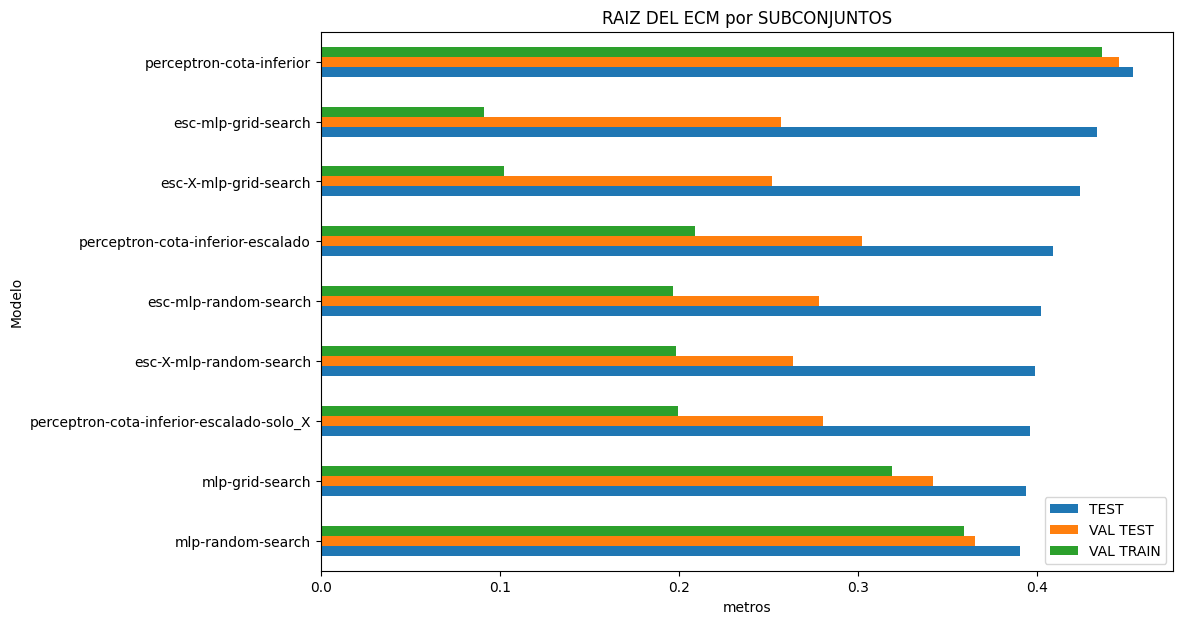

In [12]:
fig, ax = plt.subplots(figsize=(11,7))
runs = runs.sort_values(by='TEST_ROOT_MEAN_SQ_ERROR')

runs.plot(x = 'Name', y = ['TEST_ROOT_MEAN_SQ_ERROR', 'CV_TEST_RMSE', 'CV_TRAIN_RMSE' ], kind = 'barh', ax=ax)
plt.legend(['TEST', 'VAL TEST', 'VAL TRAIN'], loc='best')
ax.set_title('RAIZ DEL ECM por SUBCONJUNTOS')
ax.set_ylabel('Modelo')
ax.set_xlabel('metros')

Viendo esta gráfica observamos que la mayoria de modelos tienen un error de test bastante parecido, que no tiene nada que ver con los errores de validación que son muy dispersos. De hecho, podríamos llegar a decir que los modelos con mayor error en validación son mejores en test a excepción de "perceptron-cota-inferior".

### Otras métricas sobre el conjunto TEST

#### Error absoluto medio

Al no usar cuadrados y raices es una métrica más precisa del error

Text(0.5, 0, 'metros')

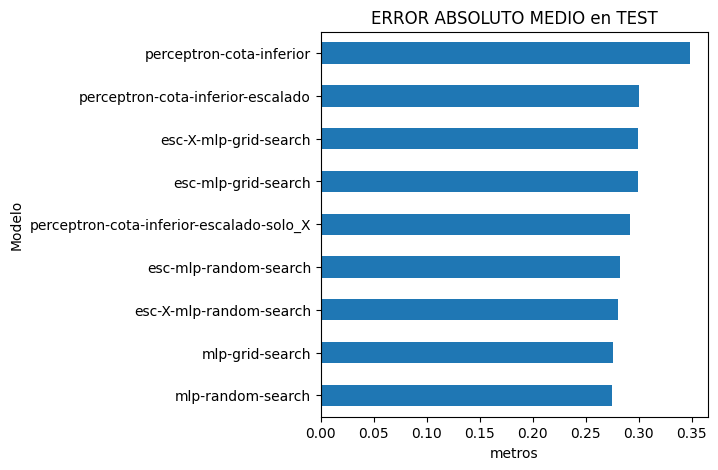

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
runs = runs.sort_values(by='TEST_MEAN_ABS_ERROR')

runs.plot(x = 'Name', y = ['TEST_MEAN_ABS_ERROR'], kind = 'barh', ax=ax)
ax.set_title('ERROR ABSOLUTO MEDIO en TEST')
ax.get_legend().remove()
ax.set_ylabel('Modelo')
ax.set_xlabel('metros')

Vemos que los errores son muy similares al test_root_mean_sq_error

#### Mediana del error absoluto


Text(0.5, 0, 'metros')

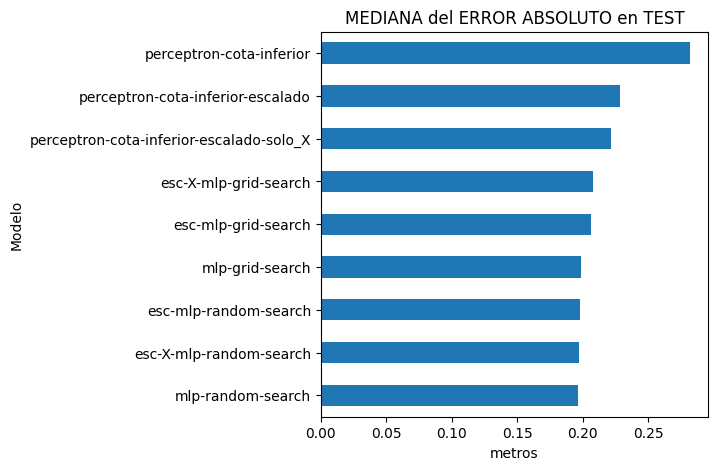

In [14]:
fig, ax = plt.subplots(figsize=(5,5))
runs = runs.sort_values(by='TEST_MEDIAN_ABS_ERROR')

runs.plot(x = 'Name', y = ['TEST_MEDIAN_ABS_ERROR'], kind = 'barh', ax=ax)
ax.set_title('MEDIANA del ERROR ABSOLUTO en TEST')
ax.get_legend().remove()
ax.set_ylabel('Modelo')
ax.set_xlabel('metros')

#### Error máximo:

Text(0.5, 0, 'metros')

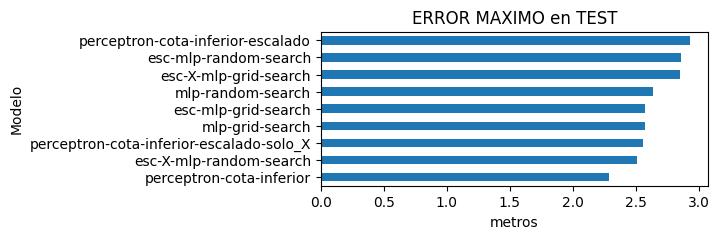

In [15]:
fig, ax = plt.subplots(figsize=(5,2))
runs = runs.sort_values(by='TEST_MAX_ERROR')

runs.plot(x = 'Name', y = ['TEST_MAX_ERROR'], kind = 'barh', ax=ax)
ax.set_title('ERROR MAXIMO en TEST')
ax.get_legend().remove()
ax.set_ylabel('Modelo')
ax.set_xlabel('metros')

En esta métrica los errores son distintos y apreciamos que uno de los modelos baseline es el mejor en esta métrica.

Sin embargo con estas gráficas es muy complicado analizar cuál es el mejor modelo.
Vamos a pintar para que se vea más claro.

In [16]:

metrics = ['TEST_ROOT_MEAN_SQ_ERROR', 'TEST_MEAN_ABS_ERROR', 'TEST_MEDIAN_ABS_ERROR', 'TEST_MAX_ERROR']
titles = ['RAIZ DEL ECM en TEST', 'ERROR ABSOLUTO MEDIO en TEST', 'MEDIANA del ERROR ABSOLUTO en TEST', 'ERROR MAXIMO en TEST']

best_models = set(runs["Name"].unique())

In [17]:
best_models

{'esc-X-mlp-grid-search',
 'esc-X-mlp-random-search',
 'esc-mlp-grid-search',
 'esc-mlp-random-search',
 'mlp-grid-search',
 'mlp-random-search',
 'perceptron-cota-inferior',
 'perceptron-cota-inferior-escalado',
 'perceptron-cota-inferior-escalado-solo_X'}

In [19]:
colors = ['#6CCFF6', '#BFF6FF', '#FF95FD', '#FFF93E', 'green', '#00008B', '#D17A17', '#D62D2D', 'black']
dictCol = dict(zip(best_models, colors))

In [20]:
runs.loc[:, ['color']] = runs.Name.map(dictCol)

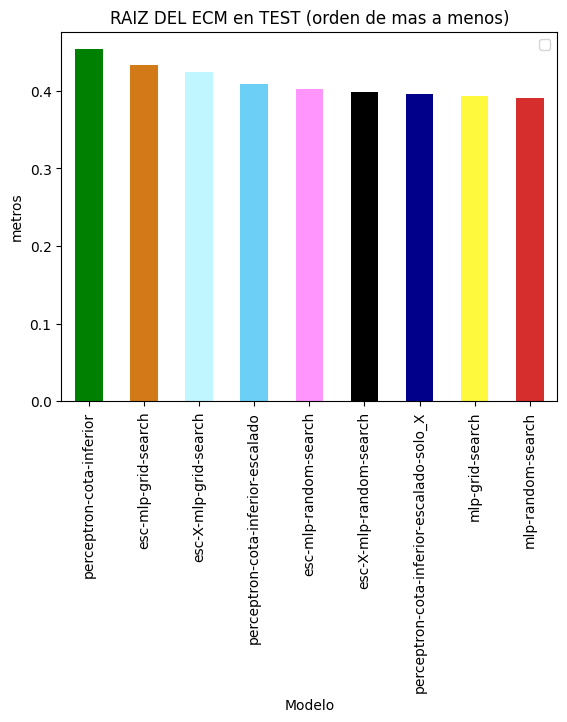

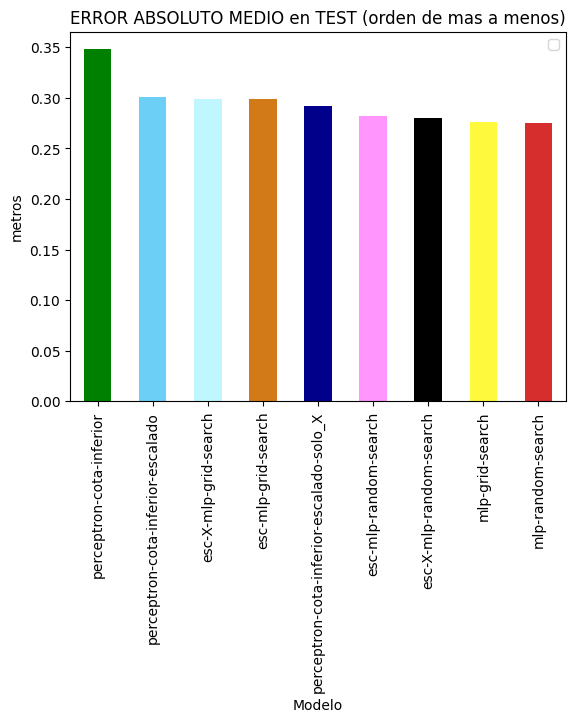

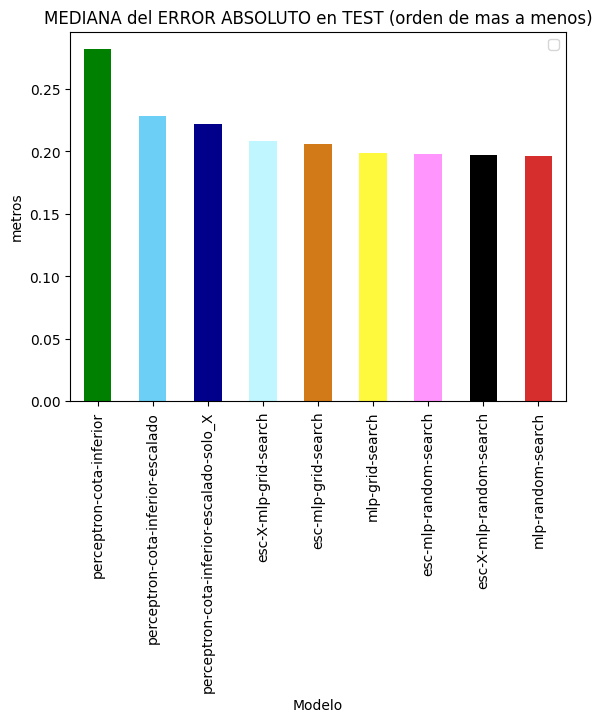

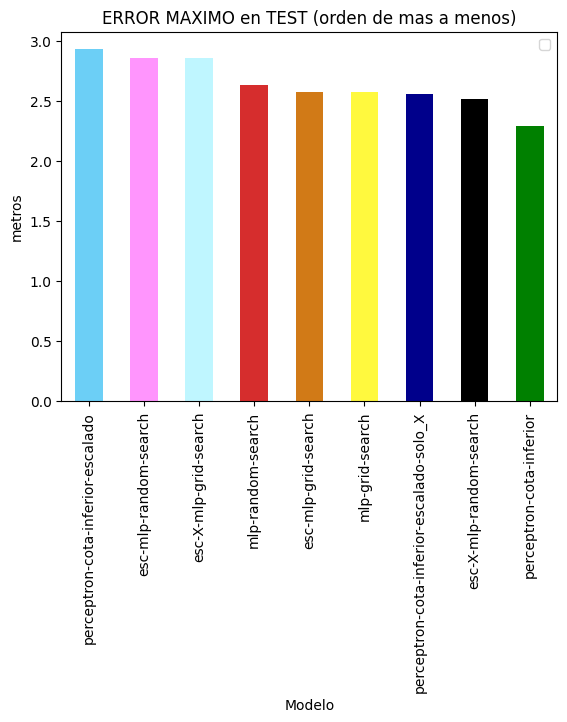

In [22]:
for title, metric in zip(titles, metrics):
    fig,ax = plt.subplots()
    df = runs.sort_values(by=metric, ascending=False) # ordenamos por nombre para que aparezcan en el mismo orden
    
    
    df.plot(x = 'Name', y = metric, kind='bar', color=df.color, ax=ax)
    ax.legend([])
    ax.set_title(title + " (orden de mas a menos)")
    ax.set_ylabel('metros')
    ax.set_xlabel('Modelo')

Podemos ver que el modelo rojo correspondiente al modelo obtenido de aplicar random_search a los datos originales es el mejor en 3 métricas, sin embargo en la métrica que mide el error máximo de cada modelo, este modelo está entre los peores.

Como esta métrica la consideramos de las más importantes (nos da confianza de que si el modelo se equivoca no se va a equivocar por mucho) vamos a buscar un modelo que sea consistente en todas las métricas. 

Por ello de momento creemos que el mejor modelo es el modelo escogido mediante random_search y escalando las variables X (color negro).

### Análisis de gráficas de dispersión (Y_true vs Y_predicted) por segmentos (Alturas de olas)

In [23]:
# cargamos datos
X_train, X_test, y_train, y_test = sep_train_test()

##### Separamos las olas en 4 grupos por rangos de altura:

In [24]:
def class_ola(ola):
    if (ola < 1):
        return "x<1"
    if (ola < 2):
        return "1<x<2"
    if (ola < 3):
        return "2<x<3"
    else:
        return "x>3"

<Axes: title={'center': 'Segmentación de olas'}>

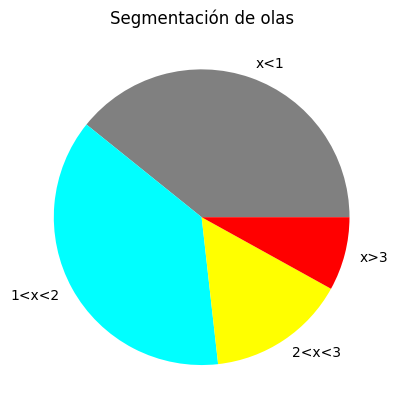

In [25]:
ola_clas = y_test.map(class_ola)
ola_clas.value_counts().plot(kind='pie', label='', title='Segmentación de olas', colors=['gray', "aqua", "yellow", "red"])

In [26]:
def ola_color(ola):
    if (ola < 1):
        return "gray"
    if (ola < 2):
        return "aqua"
    if (ola < 3):
        return "yellow"
    else:
        return "red" 

In [27]:
runs.Name.unique()

array(['perceptron-cota-inferior', 'esc-X-mlp-random-search',
       'perceptron-cota-inferior-escalado-solo_X', 'mlp-grid-search',
       'esc-mlp-grid-search', 'mlp-random-search',
       'esc-X-mlp-grid-search', 'esc-mlp-random-search',
       'perceptron-cota-inferior-escalado'], dtype=object)

In [28]:
modelos_escalado_completo = ["esc-mlp-random-search","esc-mlp-grid-search","perceptron-cota-inferior-escalado"]
modelos_escalado = ["esc-mlp-random-search","esc-mlp-grid-search","perceptron-cota-inferior-escalado",
                    "esc-X-mlp-random-search", "perceptron-cota-inferior-escalado-solo_X", "esc-X-mlp-grid-search"]

In [29]:
# Devuelve df_test modificado para que lo acepte el modelo m para hacer predict
def to_model_input(df_train, df_test, m):
    # Eliminamos las columnas repetidas y las columnas temporales (visto en el notebook del analisis)
    input_test = df_test.drop(columns=["Temperatura", 'wspd', 'anio', 'mes', 'dia', 'hora'])
    input_train = df_train.drop(columns=["Temperatura", 'wspd', 'anio', 'mes', 'dia', 'hora'])
    # if "auto" in m: no hay modelos automaticos, su rendimiento es muy bajo
    if m in modelos_escalado: # escalamos datos
        scaler = ColumnTransformer(
            transformers=[
                # no escalonamos las dummy de dirección de viento
                ("num", StandardScaler(), [c for c in input_train.columns if not c.startswith('wdir_')]),
            ],
            remainder='passthrough'
        )
        scaler.fit(input_train)
        input_test = scaler.transform(input_test)
    
    return input_test

In [30]:
def predicciones_invertir_escala(y_train, y_pred):
    scaler_y = StandardScaler()

    y_train_2d = y_train.values.reshape(-1, 1)
    y_train_2d_scaled= scaler_y.fit(y_train_2d)


    #Invertimos la escala de las predicciones
    predicciones__2d = y_pred.reshape(-1, 1)
    nuevas_predicciones = scaler_y.inverse_transform(predicciones__2d)
    
    return nuevas_predicciones
    

In [31]:
import math
def custom_round(num):
    if num >= 0:
        # Si el número es positivo, redondear hacia arriba
        return math.ceil(num)
    else:
        # Si el número es negativo, redondear hacia abajo
        return math.floor(num)

C:\Users\dacoq\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\store\artifact\utils\models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.11.3/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])
C:\Users\dacoq\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\store\artifact\utils\models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.11.3/model-registry.html#migrating-from-stages
  latest = client.get_late

Text(0.5, 0.98, 'Alturas de olas: PREDICTED vs TRUE')

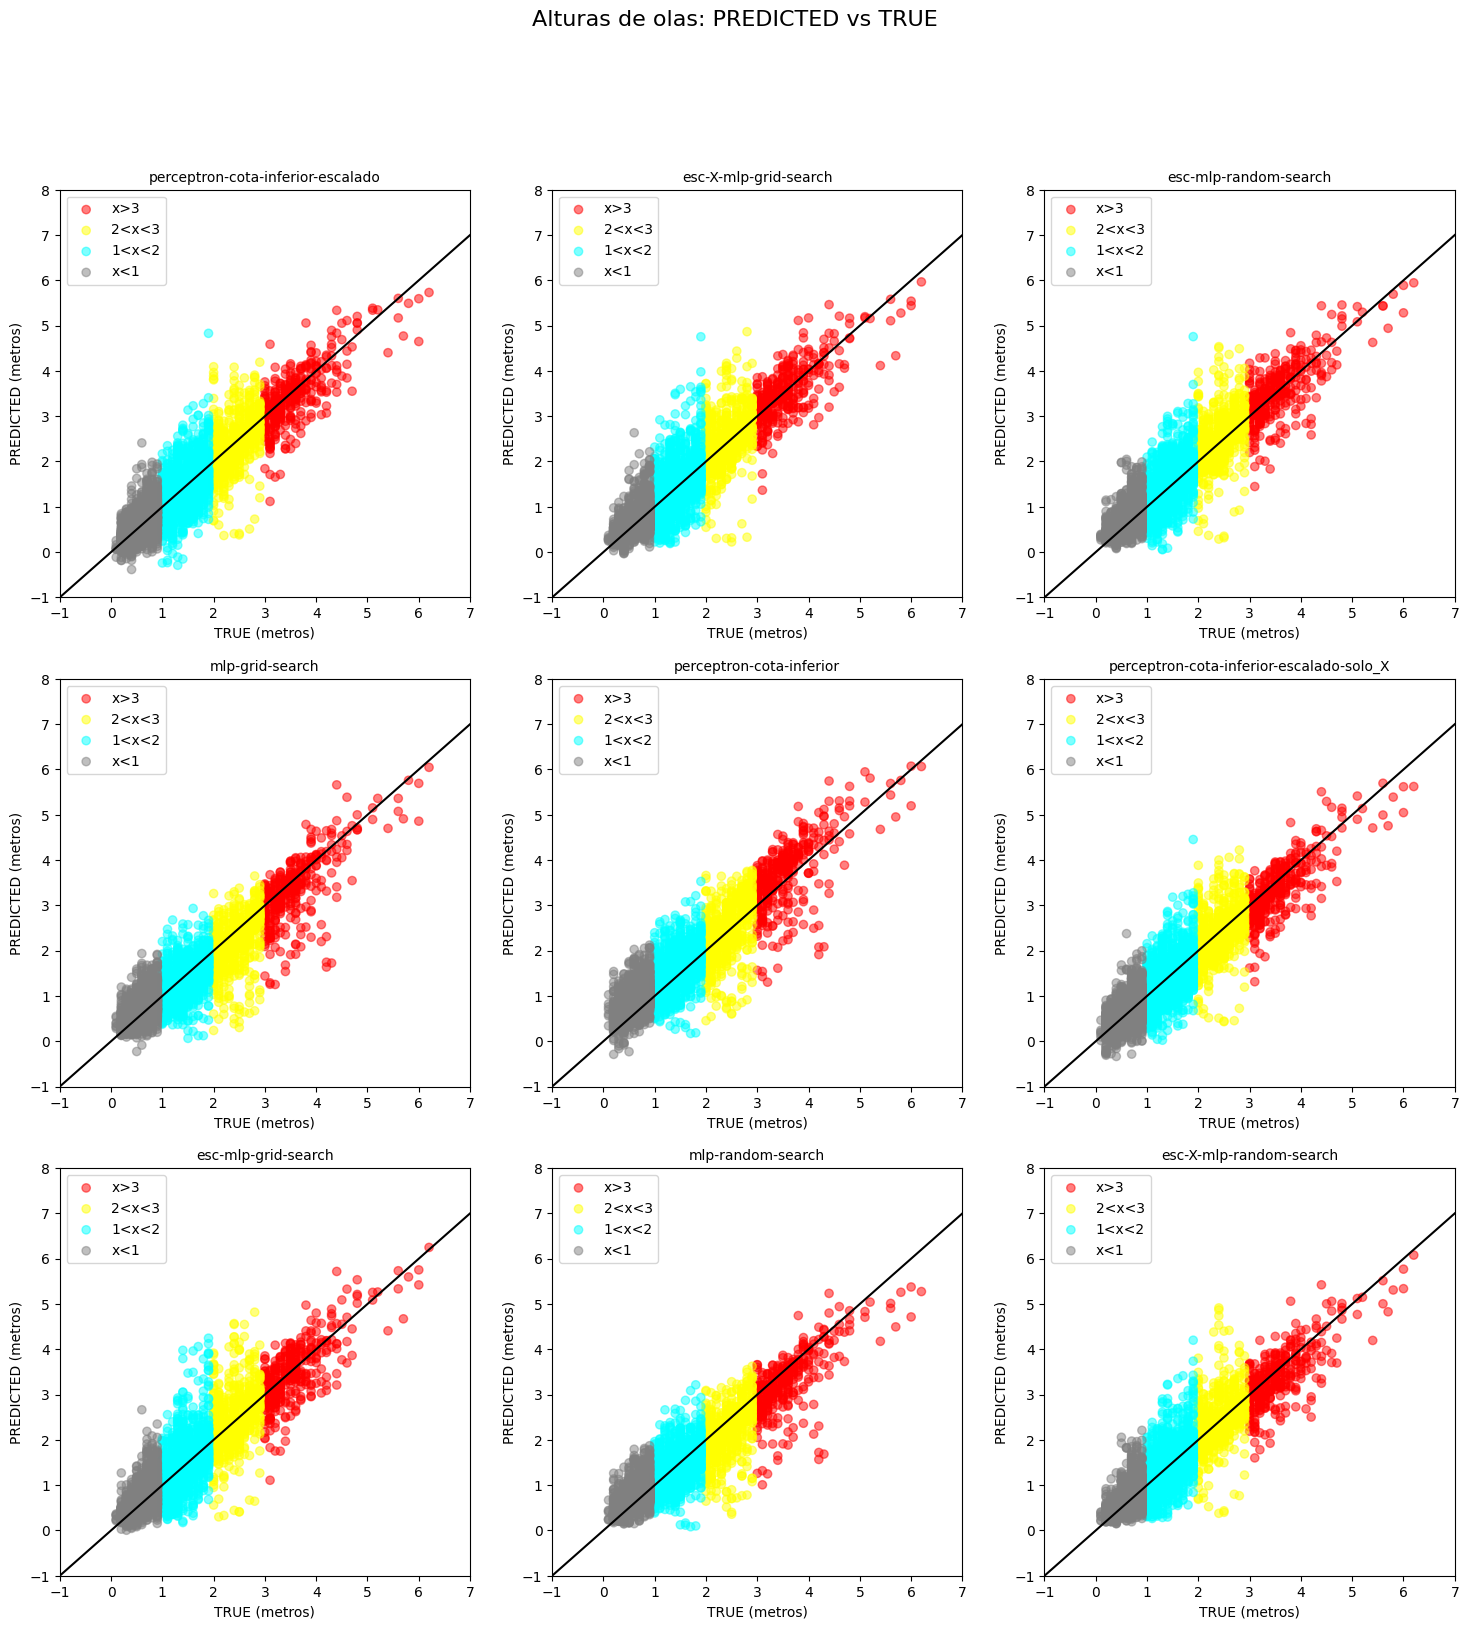

In [32]:
fig, axs = plt.subplots(3, 3, figsize=(18, 18))
for i,m in enumerate(best_models):
    ax = axs[i//3, i%3]
    flo = MLFlow()
    # cargamos el modelo
    model = flo.get_saved_model(m)
    y_pred = model.predict(to_model_input(X_train, X_test, m))
    if m in modelos_escalado_completo:
        y_pred = predicciones_invertir_escala(y_train, y_pred)

    ax.set_xlim(-1, 7)
    #ax.set_ylim(-1, 7)
    for cl in ola_clas.unique():
        filter = ola_clas == cl
        ax.scatter(y_test[filter], y_pred[filter], color=y_test[filter].map(ola_color), alpha=0.5, clip_on=True)
    
    # nuestra recta - objetivo
    ax.axline((0, 0), (7, 7), color="0")
    ax.legend(["x>3", "2<x<3", "1<x<2", "x<1"], loc='upper left')
    ax.set_xlabel('TRUE (metros)')
    ax.set_ylabel('PREDICTED (metros)')
    ax.set_title(m, fontsize=10)
    limite_y_abajo, limite_y_arriba = ax.get_ylim()
    limite_y_abajo = custom_round(limite_y_abajo)
    limite_y_arriba = custom_round(limite_y_arriba)
    ax.set_xticks(np.linspace(-1, 7, 9))
    ax.set_yticks(np.linspace(limite_y_abajo,limite_y_arriba, limite_y_arriba - limite_y_abajo + 1))
fig.suptitle('Alturas de olas: PREDICTED vs TRUE', fontsize=16)

Podemos ver que el gráfico de dispersión de todos los modelos son muy similares.

Por tanto el modelo de mlp elegido es el modelo proporcionado por randomSearchCv escalando solo las variables explicativas.

In [33]:
runs[runs["Name"] == "esc-X-mlp-random-search"][["activation", "alpha", "batch_size", "hidden_layer_sizes"]]

,activation,alpha,batch_size,hidden_layer_sizes
3,relu,0.2801,556.0,"(67, 93, 54)"


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


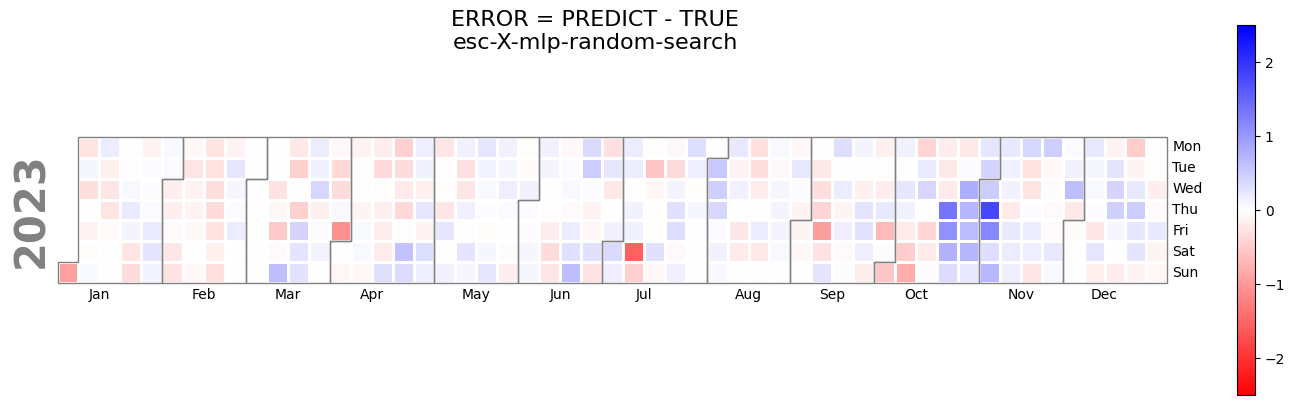

In [39]:
m = "esc-X-mlp-random-search"

flo = MLFlow()
# cargamos el modelo
model = flo.get_saved_model(m)
# pasamos numpy a Series
y_pred = model.predict(to_model_input(X_train, X_test, m))

diff = y_pred - y_test
# para los colores https://stackoverflow.com/questions/16834861/create-own-colormap-using-matplotlib-and-plot-color-scale
cvals  = [-2.5, 0, 2.5]
colors = ['red', '1', 'blue']

norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = LinearSegmentedColormap.from_list("", tuples)
plot_calendar(X_test, diff, 'ERROR = PREDICT - TRUE\n' + m, cmap, vmin=-2.5, vmax=2.5)

Si mostramos el calendario de errores de nuestor modelo elegido comprobamos que subestimamos pocos días las olas y que la mayoría de al año de media predecimos bien.